## Homework 2: Data Analysis and Functions

This assignment covers topics in data import, analysis, and visualization. 

* Import and Analyze Data
* Visualize Data with Plots

It also covers how to use packages with built-in functions or create a custom function.

* Built-in functions
* Custom functions

### Problem #1 Tutorial

Pandas is a package for data analysis. This problem demonstrates how to use Pandas to perform an analysis on Apple stock. The assignment is then to perform a similar analysis to compare the performance of multiple stocks. The following is Historical Data for the Apple stock from 2018:

* <a href='https://apmonitor.com/che263/uploads/Main/AAPL.csv' target='_blank'>AAPL (Apple), URL: https://apmonitor.com/che263/uploads/Main/AAPL.csv</a>

***Step 1a:*** The data is imported into a Pandas dataframe. A dataframe is a structured data form, similar to an Excel sheet. It is read with the ```pd.read_csv``` function that reads a Comma Separated Value (CSV) file that contains the data. The function can either read a file on the local computer or from a URL.

In [2]:
import pandas as pd
appl = pd.read_csv('https://apmonitor.com/che263/uploads/Main/AAPL.csv')

***Step 1b:*** The leading 5 rows are shown with ```pd.head()```.

In [3]:
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-04,164.880005,172.009995,164.770004,171.610001,171.610001,34605500
1,2018-04-05,172.580002,174.229996,172.080002,172.800003,172.800003,26933200
2,2018-04-06,170.970001,172.479996,168.199997,168.380005,168.380005,35005300
3,2018-04-09,169.880005,173.089996,169.850006,170.050003,170.050003,29017700
4,2018-04-10,173.000000,174.000000,171.529999,173.250000,173.250000,28408600


***Step 1c:***  The last 5 rows are shown with ```pd.tail()```. That number of rows can be adjusted by adding an integer number as an argument of the function.

In [10]:
appl.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2018-05-02,175.229996,177.750000,173.800003,176.570007,176.570007,66539400
21,2018-05-03,175.880005,177.500000,174.440002,176.889999,176.889999,33855800
22,2018-05-04,178.250000,183.649994,178.169998,182.929794,182.929794,27037277


***Step 1d:*** Basic statistics are shown with the ```appl.describe()``` function. This includes the number of data points (count), average (mean), standard deviation (std), minimum (min), percentiles (25%, 50%, 75%), and maximum (max) for each data column.

In [11]:
appl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01
mean,170.720001,172.835651,169.411740,171.171297,171.171297,3.388223e+07
std,5.098656,5.111622,5.589069,5.693840,5.693840,1.253788e+07
min,162.130005,164.330002,160.630005,162.320007,162.320007,2.075450e+07
25%,166.040001,168.229996,164.430000,165.489998,165.489998,2.676930e+07
50%,172.229996,173.919998,171.529999,172.440002,172.440002,2.901770e+07
75%,174.904999,176.014999,173.825005,175.275002,175.275002,3.533055e+07
max,178.250000,183.649994,178.169998,182.929794,182.929794,6.653940e+07


***Step 1d:*** Alternatively, the ```max```, ```min```, ```np.stdev```, ```np.mean```, and ```np.median``` functions can be used to report specific descriptive statistics.

In [17]:
import numpy as np
ac = appl['Open']
print(' max   : ' + str(max(ac)))
print(' min   : ' + str(min(ac)))
print(' stdev : ' + str(np.std(ac)))
print(' avg   : ' + str(np.mean(ac)))
print(' median: ' + str(np.median(ac)))

 max   : 178.25
 min   : 162.130005
 stdev : 4.986583644140891
 avg   : 170.72000065217392
 median: 172.229996


***Step 1e:*** Create a time-series plot of the stock *High*, *Low*, and *Open* price for each day.

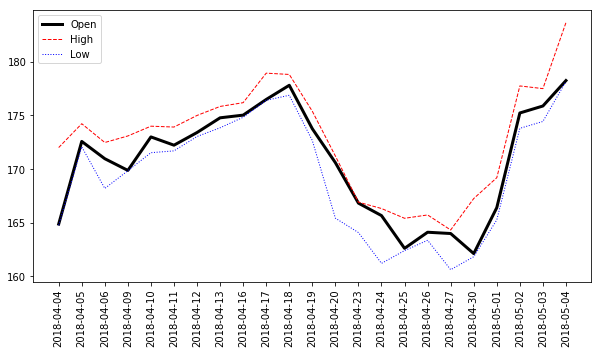

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(appl['Date'],appl['Open'],'k-',linewidth=3)
plt.plot(appl['Date'],appl['High'],'r--',linewidth=1)
plt.plot(appl['Date'],appl['Low'],'b:',linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

### Problem #1 Exercise

***Action 1a:*** Visit <a href='https://finance.yahoo.com' target='_blank'>Yahoo Finance</a> and select a stock by searching for a company name (e.g. Google). Download the Historical Data and import the data for two additional company stocks, each with the appropriate stock ticker symbol. Alternatively, use the following data from 2018:

* <a href='https://apmonitor.com/che263/uploads/Main/GOOG.csv' target='_blank'>GOOG (Google), URL: https://apmonitor.com/che263/uploads/Main/GOOG.csv</a>
* <a href='https://apmonitor.com/che263/uploads/Main/XOM.csv' target='_blank'>XOM (ExxonMobil), URL: https://apmonitor.com/che263/uploads/Main/XOM.csv</a>

Import the data into two separate dataframes with names of the stock ticker.

***Action 1b:*** Show the first 7 rows of each stock.

***Action 1c:*** Calculate the MAX, MIN, STDEV, and AVERAGE for each stock “Close” data.

***Action 1d:*** Divide the *Close* price by the maximum *Close* price over the past month so that all values are divided by the maximum value for that particular stock. Repeat this for both stocks so that the stock prices can be more easily compared on the same plot.

***Action 1e***: Generate a plot that includes the two stock “Close” data and daily “High” and “Low” values. The final plot should be both descriptive with a legend and axis labels.

***Action 1f:*** Save the figure as a **PNG** file with ```plt.savefig('myPlot.png')``` or change the file name to ```myPlot.jpg``` for a **JPEG** format. Locate the file ```myPlot.png``` or ```myPlot.jpg```.

### Problem #2

***Action:*** Import and display the first 5 rows of data from an <a href='https://apmonitor.com/heat.htm' target='_blank'>Arduino temperature control device</a> with Pandas.

* <a href='http://apmonitor.com/che263/uploads/Main/tclab.txt' target='_blank'>TCLab Data, URL: http://apmonitor.com/che263/uploads/Main/tclab.txt</a>

This TCLab device is used later for the <a href='http://apmonitor.com/che263/index.php/Main/CourseProjects' target='_blank'>Course Project</a> and in the <a href='https://apmonitor.com/heat.htm' target='_blank'>Process Dynamics and Control Course</a>.

***Action:*** Display summary statistics of the data with DataFrame ```df.describe()``` function. 

Below is an animation of adjustments to the heater to drive the temperature to a target set point, similar to how a thermostat works in a home. 

<img src='https://apmonitor.com/pdc/uploads/Main/pid_control.gif'>

***Subplots:*** A subplot is generated with the ```plt.subplot``` command with three arguments (# rows, # columns, current plot). A subplot with 2 rows (vertical) and 1 column (horizontal) is created with ```plt.subplot(2,1,1)```. The first two numbers don't change when plotting in the lower window with ```plt.subplot(2,1,2)```.

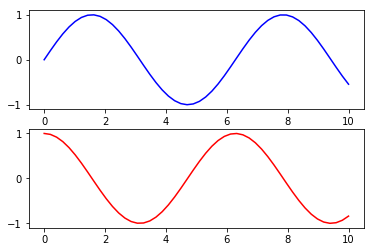

In [28]:
x = np.linspace(0,10)
plt.subplot(2,1,1)
plt.plot(x,np.sin(x),'b-')
plt.subplot(2,1,2)
plt.plot(x,np.cos(x),'r-')

***Action:*** Generate a plot that shows the measured TCLab temperature values on one subplot and the heater values on another subplot. Add appropriate labels to the plots such as x-label, y-label, title, and legend.

### Problem #3

Python has built-in functions or allows the user to create new functions.

***Action:*** For each input value, evaluate the output function for ID 3a-3d.

| ID | Input Value (x) | Output Function f(x) |
| --- | --- | --- |
| 3a | 0.5 radians | cos(x) |
| 3b | 30 degrees | sin(x) |
| 3c | 25 | x! (x factorial) |
| 3d | 4.999 | largest integer less than or equal to x |

For each function, evaluate it at the specified input value.

***Custom Functions:*** A custom function is defined with ```def``` such as:

```python
def myFcn(x):
    return x**2

print(myFcn(2))
print(myFcn(4))
```

This gives an output of 4 and 16 as the function is evaluated with input arguments of 2 and 4, respectively.

***Action:*** Create a custom function for ID 3e-3g that can be used to evaluate the input values.

| ID | Input Values (x) | Output Function f(x) |
| --- | --- | --- |
| 3e |np.linspace(2,5) | $tan(\pi/x)$ with $\pi$/x in radians |
| 3f |np.linspace(0,10) | maximum of $2 \sqrt{x}$, $x^2/2$, $x^3/3$, and $(x^2+x^3)/5$ |
| 3g |np.linspace(0,2) | x^2 when x<1; $\sin{\left(\pi x/2\right)}$ when x≥1 |

***Action:*** Create plot of each function versus the specified input values.